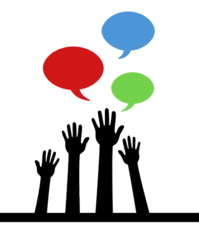

##***TASK1-  OBJECT DETECTION IN IMAGES ***

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

**MOUNTING THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/yolov2


**I have used the yolo version 2 way**

**READING THE YOLOV2 CFG FILES AND WEIGHTS**

In [ ]:
net = cv2.dnn.readNetFromDarknet('yolo2.cfg','yolov2.weights')

In [ ]:
classes =[]
with open('coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

In [ ]:
sample=cv2.imread('walk.jpg')
sample= cv2.resize(sample,(1300,900))

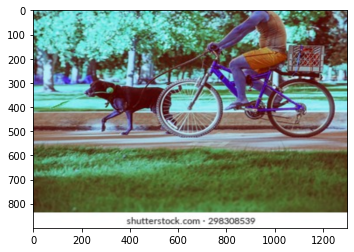

In [ ]:
plt.imshow(sample)

**ACCESSING THE HEIGHT AND WIDTH OF THE IMAGE INPUT**

In [ ]:
ht,wt, _ = sample.shape

***CONVERTING THE BGR TO RGB FORMAT OF THE IMAGE  ***

---



In [ ]:
blob=cv2.dnn.blobFromImage(sample,1/255,(416,416),(0,0,0),swapRB = True, crop = False)

**USED DEEP NEURAL NETWORK  (DNN)**

In [ ]:
blob.shape

(1, 3, 416, 416)

In [ ]:
net.setInput(blob)

In [ ]:
last_layer= net.getUnconnectedOutLayersNames()

In [ ]:
layer_out = net.forward(last_layer)

In [ ]:
boxes =[]
confidences =[]
class_ids =[]
for output in layer_out:
    for detection in output:
        score = detection [5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .5:
            centre_x= int(detection [0] *wt)
            centre_y = int(detection[1] *ht)
            w= int(detection[2] *wt)
            h= int(detection[3] *ht)
            
            x= int(centre_x - w/2)
            y= int(centre_y - h/2)
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
colors= np.random.uniform(0,0,size= (len(boxes),3))
#colors= np.random.uniform(0,255,255)

**FINAL STEP TO PUT THE OBSERVATION ON THE UP LEFT OF THE IMAGE**

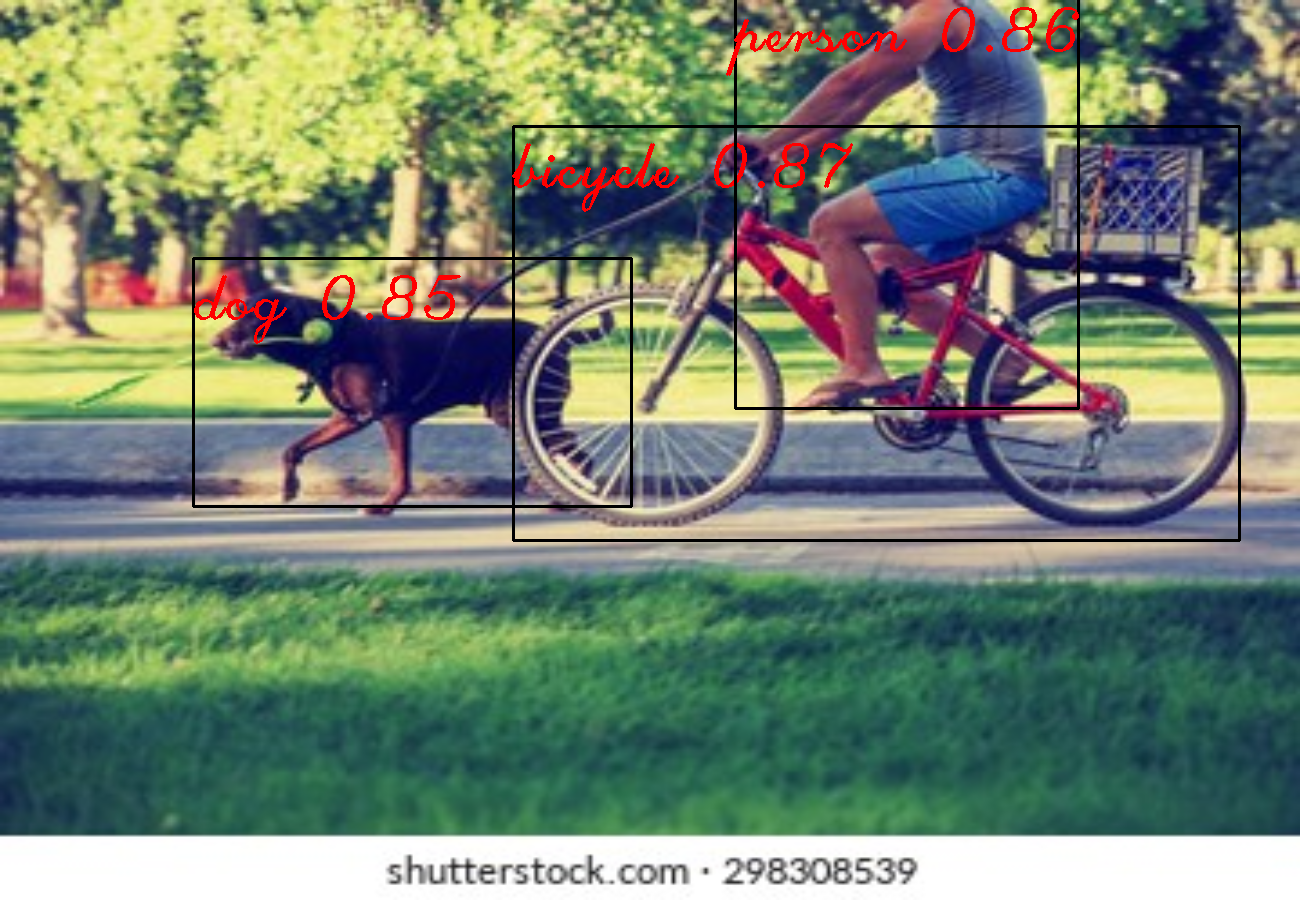

-1

In [ ]:
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    label= str(classes[class_ids[i]])
    confidence= str(round(confidences[i],2))
    color=colors[i]
    cv2.rectangle(sample,(x,y),(x+w,y+h),color,2)
   # cv2.putText(my_img,label +"  "+confidence,(x,y+20),font,2,(0,0,0),2)
    cv2.putText(sample,label +" "+confidence,(x,y+60),font,2,(0,0,255),2)
#cv2.imshow('img',my_img)
cv2_imshow(sample)
plt.show()
cv2.waitKey(0)